In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Training Data

In [6]:
train = pd.read_csv("train.csv", header=None, encoding='latin-1')

In [8]:
train.tail()

,0,1,2,3,4,5
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [66]:
# Function to remove special characters such as `@`, `-`, `?`, etc.
# from the text and returning lowercase processed text.

import string
import re

def preprocess_tweets(tweet):
    
    regex = re.compile('[%s]|\d+' % re.escape(string.punctuation))
    return regex.sub('', tweet.lower())

In [61]:
X = train.iloc[:, 5].apply(preprocess_tweets)
y = train[[0]]
# Replacing class==`4` with `1`
y = np.where(y==4, 1, 0)

In [64]:
# Feature extraction using CountVectorizer in 
# form of binary events.

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
X = cv.fit_transform(X)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=27)

# Looping over possible values for parameter `C`
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print("Accuracy for C=%s: %s"
          %(c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C=0.01: 0.787415
Accuracy for C=0.05: 0.795885
Accuracy for C=0.25: 0.800065
Accuracy for C=0.5: 0.80061
Accuracy for C=1: 0.7998125


## Testing Data

In [43]:
test = pd.read_csv('test.csv', header=None, encoding='latin-1')
test.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [44]:
# X_test = test[[5]]

,0,1,2,3,4,5
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."
497,0,14076,Sun Jun 14 21:36:17 UTC 2009,iran,captain_pete,Reading the tweets coming out of Iran... The w...


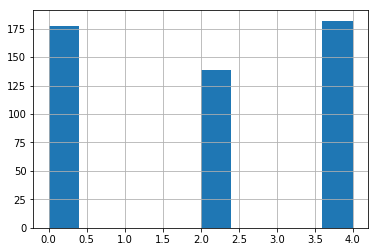

In [46]:
test.iloc[:, 0].hist()

In [75]:
# filtering out data points of class==`2` i.e. 'neutral'

neutral_test_data = test[test.iloc[:, 0] != 2]

In [76]:
X_test = neutral_test_data.iloc[:, 5].apply(preprocess_tweets)
y_test = neutral_test_data[[0]]

y_test[y_test==4] = 1

In [77]:
X_test = cv.transform(X_test)

In [80]:
lr = LogisticRegression(C=0.5, n_jobs=5)
lr.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=5,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
print("Accuracy: %s"%(accuracy_score(y_test, lr.predict(X_test))))

Accuracy: 0.8217270194986073


In [86]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, lr.predict(X_test))
print(matrix)

[[142  35]
 [ 29 153]]


In [92]:
print("Precision: %s \nRecall:    %s"%(matrix[1][1]/(matrix[1][1]+matrix[0][1]), matrix[1][1]/(matrix[1][1]+matrix[1][0])))

Precision: 0.8138297872340425 
Recall:    0.8406593406593407
